## EDA

We will perform EDA on the scraped dataset. We will use the dataset that has all the data cleaned to perform this analysis. Cleaned reviews are useful to see EDA on token content

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import plotly.io as pio
svg_renderer = pio.renderers["svg"]
svg_renderer.width = 1000
svg_renderer.height = 500
pio.renderers.default = "svg"
import plotly.express as px
import plotly.figure_factory as ff


In [48]:
df = pd.read_csv('../data/cleaned_reviews_1.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2896 entries, 0 to 2895
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Customer Review  2896 non-null   object
 1   Date Of Stay     2893 non-null   object
 2   Customer Rating  2896 non-null   object
 3   Owner Responded  2896 non-null   bool  
dtypes: bool(1), object(3)
memory usage: 70.8+ KB


In [45]:
words = ''
for review in df['Customer Review']:
    tokens = str(review).split()
    
    words += ' '.join(tokens) + ' '

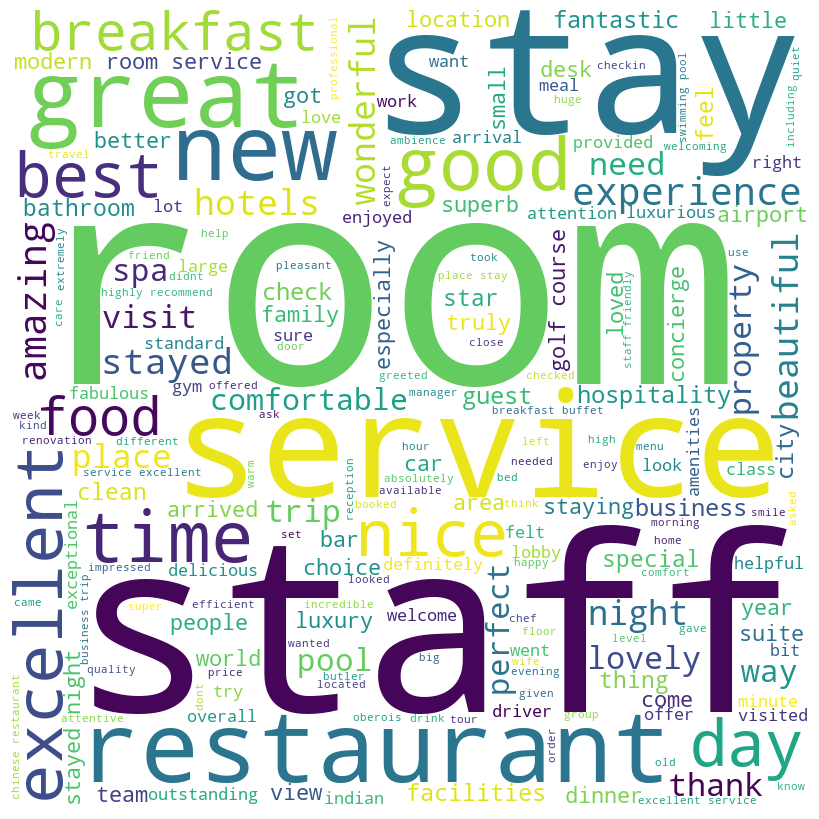

In [46]:
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white',
                collocations=True,
                min_font_size = 10).generate(words) 

plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

Next thing we can do is to create wordcloud for specific rating class. Here let's take review below 3 star i.e 2 and 1 which can be inferred as negative sentiment and plot the wordcloud

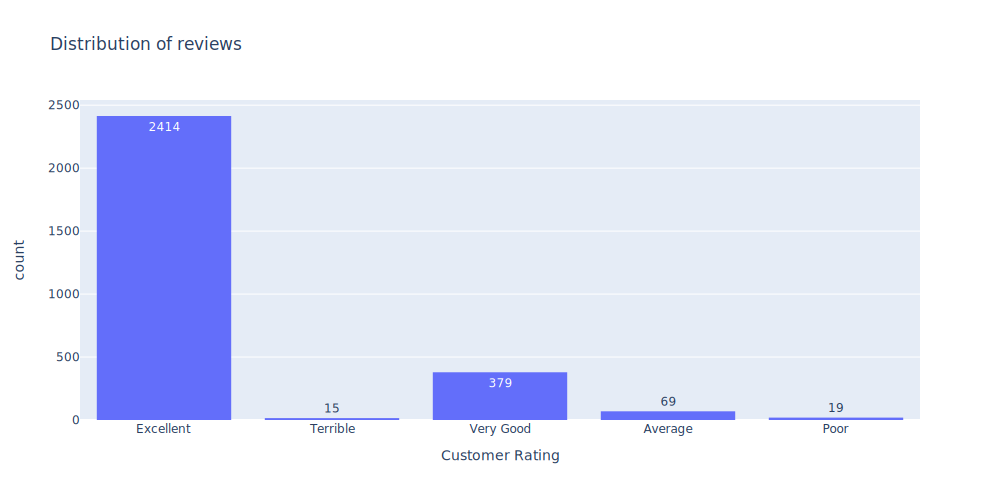

In [47]:
# Plot distribution of review count based on customer ratings
fig = px.histogram(df, 
                    x='Customer Rating', 
                    text_auto=True, 
                    log_y=False,
                    title='Distribution of reviews')
fig.show()

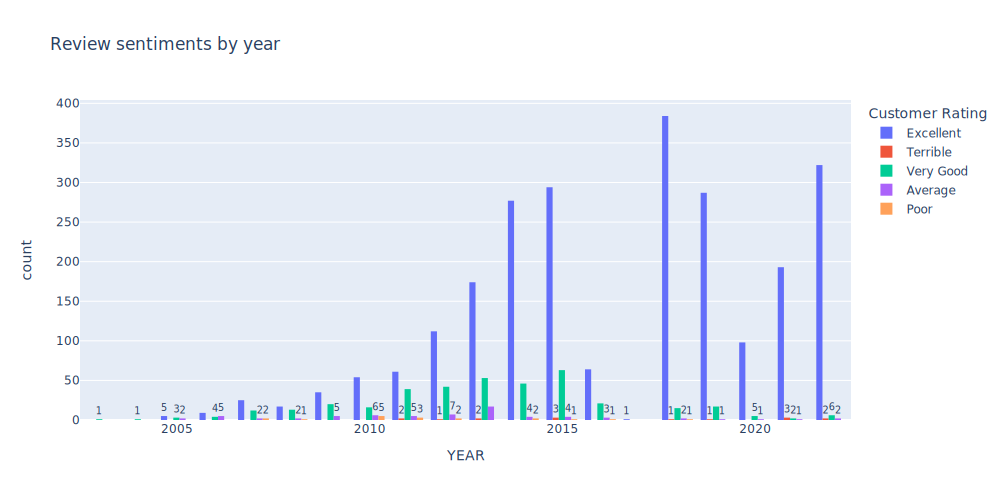

In [58]:
# Creating a year column so that we can plot the review count per year instead of individual days
df['Date Of Stay'] = pd.to_datetime(df['Date Of Stay'], format='%m/%y')
df['YEAR'] = df['Date Of Stay'].dt.year
df
fig = px.histogram(df, 
                    x='YEAR', 
                    color='Customer Rating', 
                    text_auto=True, 
                    log_y=False,
                    barmode='group',
                    title='Review sentiments by year')
fig.show()